In [3]:
%pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from matplotlib import rcParams
from matplotlib.patches import Arc
from highlight_text import fig_text
import seaborn as sns


In [5]:
%matplotlib inline

In [6]:
df_home=pd.read_csv(r'Arsenal v Man United.csv',encoding="latin1")

In [7]:
df_home.head()

,Minute,Player,Squad,xG,PSxG,Outcome,Distance,Body Part,Notes,Player.1,Event,Player.2,Event.1
0,6,Lia WÃ¤lti,Arsenal,0.05,NaN,Blocked,21.0,Right Foot,Volley,NaN,NaN,NaN,NaN
1,7,Leah Galton,Manchester Utd,0.05,0.15,Saved,16.0,Left Foot,NaN,Ella Toone,Pass (Live),Alessia Russo,Tackle
2,13,Maya Le Tissier,Manchester Utd,0.02,NaN,Off Target,14.0,Head,NaN,Katie Zelem,Pass (Dead),NaN,NaN
3,26,Nikita Parris,Manchester Utd,0.04,NaN,Blocked,18.0,Left Foot,NaN,Nikita Parris,Pass (Live),Hayley Ladd,Pass (Live)
4,27,Alessia Russo,Manchester Utd,0.02,NaN,Off Target,13.0,Head,NaN,Ona Batlle,Pass (Live),Nikita Parris,Shot


In [8]:
df_home = df_home.loc[df_home['Squad'] == 'Arsenal']

In [9]:
df_home

,Minute,Player,Squad,xG,PSxG,Outcome,Distance,Body Part,Notes,Player.1,Event,Player.2,Event.1
0,6,Lia WÃ¤lti,Arsenal,0.05,NaN,Blocked,21.0,Right Foot,Volley,NaN,NaN,NaN,NaN
7,46,Frida Maanum,Arsenal,0.05,0.32,Goal,27.0,Right Foot,Deflected,Frida Maanum,Dribble,NaN,NaN
9,52,Stina Blackstenius,Arsenal,0.04,NaN,Off Target,22.0,Right Foot,NaN,Caitlin Foord,Interception,NaN,NaN
10,58,Lotte Wubben-Moy,Arsenal,0.04,NaN,Off Target,12.0,Head,NaN,Steph Catley,Pass (Dead),Frida Maanum,Fouled
11,59,Jordan Nobbs,Arsenal,0.04,NaN,Blocked,30.0,Right Foot,NaN,Beth Mead,Pass (Live),Frida Maanum,Pass (Live)
12,64,Caitlin Foord,Arsenal,0.05,NaN,Blocked,15.0,Right Foot,NaN,Katie McCabe,Pass (Live),Caitlin Foord,Pass (Live)
13,73,Laura Wienroither,Arsenal,0.36,0.77,Goal,8.0,Right Foot,Volley,Katie McCabe,Pass (Live),Caitlin Foord,Pass (Live)
14,78,Beth Mead,Arsenal,0.08,NaN,Off Target,13.0,Head,NaN,NaN,NaN,NaN,NaN
15,78,Vivianne Miedema,Arsenal,0.04,NaN,Off Target,17.0,Right Foot,NaN,Laura Wienroither,Pass (Dead),NaN,NaN


In [11]:
df_home.loc[df_home.Player == 'Beth Mead','Minute'] = 78.1

In [12]:
df_home = df_home[['Minute','Player',"Squad",'xG','Outcome']]

In [13]:
df_home.loc[-1] = ['0', '', 'Arsenal', '0.0', 'None']  # adding a row
df_home.index = df_home.index + 1  # shifting index
df_home = df_home.sort_index() 

<ipython-input-13-43f121af4448>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home.loc[-1] = ['0', '', 'Arsenal', '0.0', 'None']  # adding a row


In [14]:
df_home.head()

,Minute,Player,Squad,xG,Outcome
0,0,,Arsenal,0.0,None
1,6,Lia WÃ¤lti,Arsenal,0.05,Blocked
8,46,Frida Maanum,Arsenal,0.05,Goal
10,52,Stina Blackstenius,Arsenal,0.04,Off Target
11,58,Lotte Wubben-Moy,Arsenal,0.04,Off Target


In [15]:
df_away =pd.read_csv(r'Arsenal v Man United.csv',encoding="latin1")

In [16]:
df_away.head()

,Minute,Player,Squad,xG,PSxG,Outcome,Distance,Body Part,Notes,Player.1,Event,Player.2,Event.1
0,6,Lia WÃ¤lti,Arsenal,0.05,NaN,Blocked,21.0,Right Foot,Volley,NaN,NaN,NaN,NaN
1,7,Leah Galton,Manchester Utd,0.05,0.15,Saved,16.0,Left Foot,NaN,Ella Toone,Pass (Live),Alessia Russo,Tackle
2,13,Maya Le Tissier,Manchester Utd,0.02,NaN,Off Target,14.0,Head,NaN,Katie Zelem,Pass (Dead),NaN,NaN
3,26,Nikita Parris,Manchester Utd,0.04,NaN,Blocked,18.0,Left Foot,NaN,Nikita Parris,Pass (Live),Hayley Ladd,Pass (Live)
4,27,Alessia Russo,Manchester Utd,0.02,NaN,Off Target,13.0,Head,NaN,Ona Batlle,Pass (Live),Nikita Parris,Shot


In [17]:
df_away = df_away.loc[df_away['Squad'] == 'Manchester Utd']

In [18]:
df_away

,Minute,Player,Squad,xG,PSxG,Outcome,Distance,Body Part,Notes,Player.1,Event,Player.2,Event.1
1,7,Leah Galton,Manchester Utd,0.05,0.15,Saved,16.0,Left Foot,NaN,Ella Toone,Pass (Live),Alessia Russo,Tackle
2,13,Maya Le Tissier,Manchester Utd,0.02,NaN,Off Target,14.0,Head,NaN,Katie Zelem,Pass (Dead),NaN,NaN
3,26,Nikita Parris,Manchester Utd,0.04,NaN,Blocked,18.0,Left Foot,NaN,Nikita Parris,Pass (Live),Hayley Ladd,Pass (Live)
4,27,Alessia Russo,Manchester Utd,0.02,NaN,Off Target,13.0,Head,NaN,Ona Batlle,Pass (Live),Nikita Parris,Shot
5,39,Ella Toone,Manchester Utd,0.16,0.52,Goal,7.0,Right Foot,Volley,Alessia Russo,Pass (Live),Hayley Ladd,Pass (Live)
8,49,Katie Zelem,Manchester Utd,0.07,NaN,Off Target,20.0,Left Foot,NaN,Alessia Russo,Pass (Live),Ella Toone,Pass (Live)
16,85,Millie Turner,Manchester Utd,0.14,0.10,Goal,9.0,Head,NaN,Katie Zelem,Pass (Dead),NaN,Fouled
17,90,LucÃ­a GarcÃ­a,Manchester Utd,0.21,0.10,Saved,9.0,Right Foot,Volley,Martha Thomas,Pass (Live),Ella Toone,Pass (Live)
18,90,Martha Thomas,Manchester Utd,0.12,0.11,Saved,11.0,Right Foot,NaN,Hannah Blundell,Pass (Live),LucÃ­a GarcÃ­a,Pass (Live)
19,90+1,Alessia Russo,Manchester Utd,0.11,0.25,Goal,8.0,Head,NaN,Katie Zelem,Pass (Dead),Martha Thomas,Shot


In [19]:
df_away.loc[df_away.Minute == '90+1','Minute'] = 91

In [20]:
df_away = df_away[['Minute','Player',"Squad",'xG','Outcome']]

In [23]:
df_away.head()

,Minute,Player,Squad,xG,Outcome
0,0,,Manchester Utd,0.0,None
2,7,Leah Galton,Manchester Utd,0.05,Saved
3,13,Maya Le Tissier,Manchester Utd,0.02,Off Target
4,26,Nikita Parris,Manchester Utd,0.04,Blocked
5,27,Alessia Russo,Manchester Utd,0.02,Off Target


In [22]:
df_away.loc[-1] = ['0', '', 'Manchester Utd', '0.0', 'None']  # adding a row
df_away.index = df_away.index + 1  # shifting index
df_away = df_away.sort_index() 

<ipython-input-22-df3217be7134>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_away.loc[-1] = ['0', '', 'Manchester Utd', '0.0', 'None']  # adding a row


In [24]:
df_away = df_away.astype({"xG": float, "Minute": float})
df_home = df_home.astype({"xG": float, "Minute": float})

In [25]:
df_away['xGcum'] = np.cumsum(df_away['xG'])
df_home['xGcum'] = np.cumsum(df_home['xG'])

In [26]:
df_home.head()

,Minute,Player,Squad,xG,Outcome,xGcum
0,0.0,,Arsenal,0.00,None,0.00
1,6.0,Lia WÃ¤lti,Arsenal,0.05,Blocked,0.05
8,46.0,Frida Maanum,Arsenal,0.05,Goal,0.10
10,52.0,Stina Blackstenius,Arsenal,0.04,Off Target,0.14
11,58.0,Lotte Wubben-Moy,Arsenal,0.04,Off Target,0.18


In [27]:
df_away.head()

,Minute,Player,Squad,xG,Outcome,xGcum
0,0.0,,Manchester Utd,0.00,None,0.00
2,7.0,Leah Galton,Manchester Utd,0.05,Saved,0.05
3,13.0,Maya Le Tissier,Manchester Utd,0.02,Off Target,0.07
4,26.0,Nikita Parris,Manchester Utd,0.04,Blocked,0.11
5,27.0,Alessia Russo,Manchester Utd,0.02,Off Target,0.13


In [28]:
# creating the dictionaries
x = df_home[df_home['Outcome']=='Goal']['Minute'].tolist()
x1 = df_away[df_away['Outcome']=='Goal']['Minute'].tolist()
y =df_home[df_home['Outcome']=='Goal']['xGcum'].tolist()
y1 = df_away[df_away['Outcome']=='Goal']['xGcum'].tolist()

In [29]:
#xG inside the scatterplots
y_plot =np.round(df_home[df_home['Outcome']=='Goal']['xG'],2).tolist()
y1_plot = np.round(df_away[df_away['Outcome']=='Goal']['xG'],2).tolist()

# Annotation text
text_home = df_home[df_home['Outcome']=='Goal']['Player'].tolist()
text_away = df_away[df_away['Outcome']=='Goal']['Player'].tolist()
label_home = df_home['Squad'].unique().tolist()
label_away = df_away['Squad'].unique().tolist()

In [30]:
# More annotation text
xGcum_away = str(np.round(df_away['xGcum'].iloc[-1],3))
xGcum_home = str(np.round(df_home['xGcum'].iloc[-1],3))
team_away = str(df_away['Squad'].iloc[-1])
team_home = str(df_home['Squad'].iloc[-1])

In [111]:
import matplotlib.font_manager

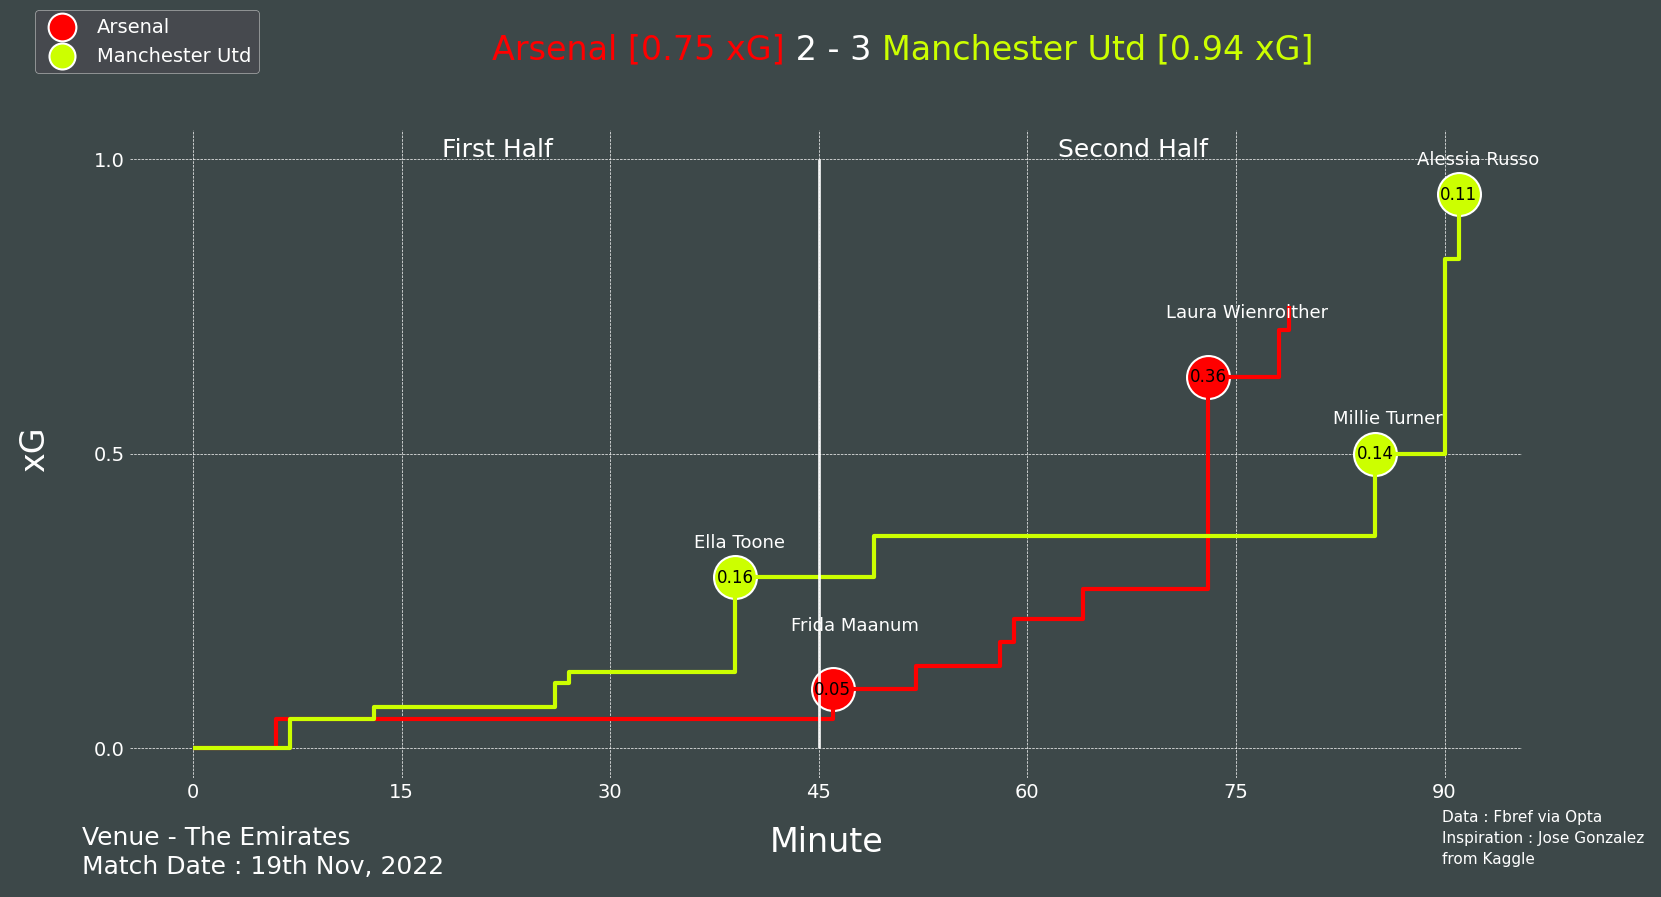

In [119]:
plt.style.use('dark_background')
fig,ax = plt.subplots(figsize = (16,8))

#fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

# Step plot for Inter and Udinese 
ax.step(x = df_home['Minute'] ,y = df_home['xGcum'] , where = 'post', color = 'red' ,linewidth = 3.0)
ax.step(x = df_away['Minute'] ,y = df_away['xGcum'] , where = 'post', color = '#CCFF00' ,linewidth = 3.0)
#sns.scatterplot(x=x,y=y,s=430,marker='o',color='yellow')
ax.scatter(x=x,y=y, color='red', edgecolor='white',s=955, label="Arsenal",linewidths=1.5)
ax.scatter(x=x1,y=y1, color='#CCFF00', edgecolor='white',s=955, label="Manchester Utd",linewidths=1.5)

#FILL AREA BETWEEN LINE AND X 
#plt.fill_between(x,y, alpha=0.08, color='red')
#plt.fill_between(x1,y1, alpha=0.08, color='#CCFF00')
# Text annotation for goals
for i in range(len(x1)):
    plt.annotate(text_away[i], (x1[i]- 3, y1[i] + 0.05),c='white',size=13)
for i in range(len(x)):
    plt.annotate(text_home[i], (x[i]- 3, y[i] + 0.1),c='white',size=13)


# legend
legend = ax.legend(loc="upper right", bbox_to_anchor=(0.1,1.2) , facecolor='#494a50')
legend.legendHandles[0]._sizes = [400]
legend.legendHandles[1]._sizes = [350]
# title
#fig_text(0.4,1.03, s="xG Race Plot WSL\n", fontsize = 25, color = "white", fontname = "Times New Roman", fontweight = "ultralight")
fig_text(0.3,1, s=" <{} [{} xG]> 2 - 3 <{} [{} xG]>".format(team_home,xGcum_home,team_away,xGcum_away),highlight_textprops=[{"color":'red'}, {'color':"#CCFF00"}], fontsize = 24, fontname = "Times New Roman", fontweight="light")
# text
fig_text(0.48,0.01, s="Minute\n", fontsize = 24, fontweight = "ultralight", fontname = "Times New Roman", color = "white")
fig_text(0.01,0.51, s="xG\n", fontsize = 24, fontweight = "ultralight", fontname = "Times New Roman", color = "white",rotation=90)
fig_text(0.275,0.87, s="First Half\n", fontsize = 18, fontweight = "ultralight", fontname = "Times New Roman", color = "white")
fig_text(0.66,0.87, s="Second Half\n", fontsize = 18, fontweight = "ultralight", fontname = "Times New Roman", color = "white")
plt.vlines( ymin=0, ymax=1,x=45, color='white', alpha=0.9,linestyle="solid")
plt.xticks([0,15,30,45,60,75,90])
plt.yticks([0,0.5,1])

fig_text(0.9,0.01, s="\nInspiration : Jose Gonzalez\nfrom Kaggle", fontsize = 11, fontweight = "ultralight", fontname = "Times New Roman", color = "white")
fig_text(0.9,0.03, s="Data : Fbref via Opta", fontsize = 11, fontweight = "ultralight", fontname = "Times New Roman", color = "white")
fig_text(0.05,0.01, s="Venue - The Emirates\nMatch Date : 19th Nov, 2022", fontsize = 18, fontweight = "ultralight", fontname = "Times New Roman", color = "white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

for i in range(len(x)):
    plt.annotate(y_plot[i], (x[i], y[i]),c='black',size=12,ha='center',va='center')
# Away team
for i in range(len(x1)):
    plt.annotate(y1_plot[i], (x1[i], y1[i]),c='black',size=12,ha='center',va='center')